### Text Processing

- Algorithms on Strings
- Docs editors, emails, messages
- Web sites, search engine
- Bio-data (genonme sequencing)
- Natural language processing (NLP)


## Pattern Matching

### Brute Force

| | |
| -- | -- |
| 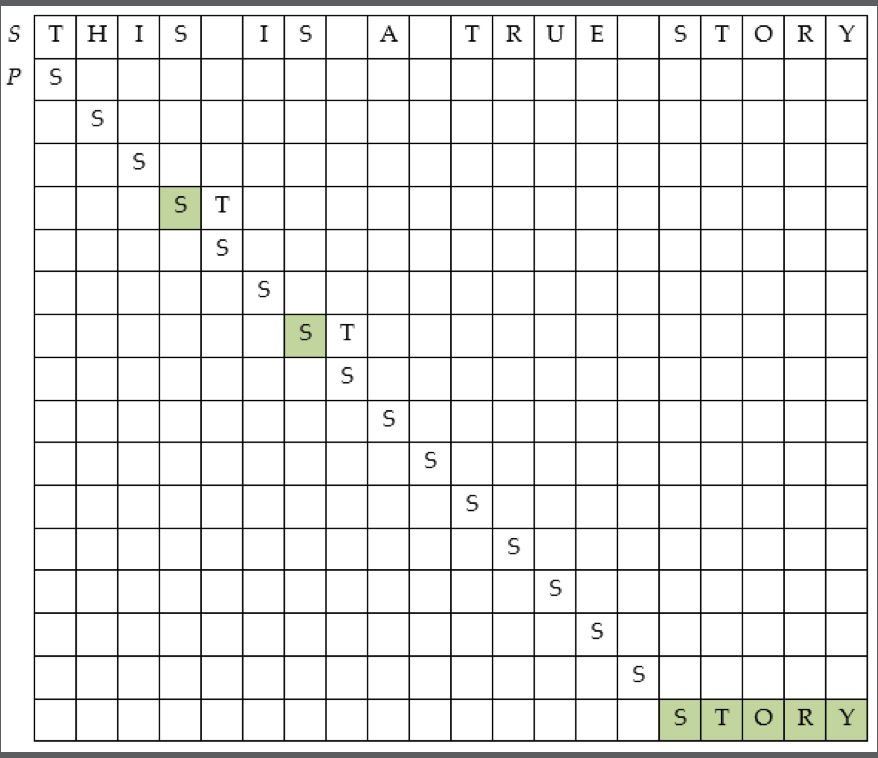 | 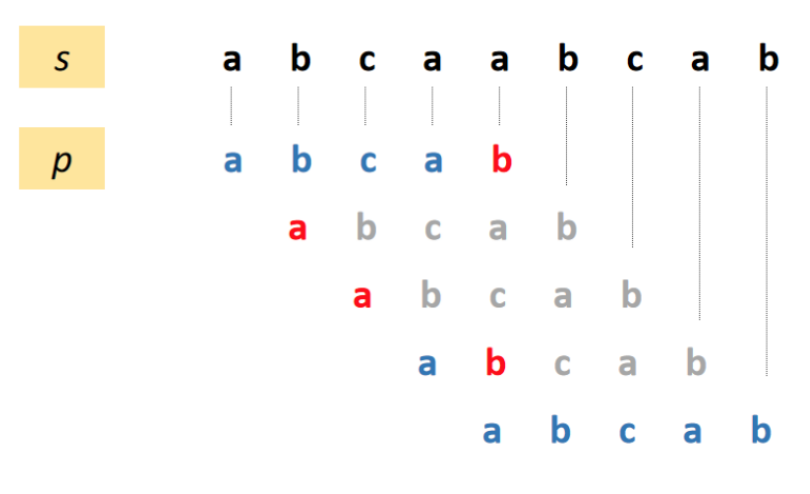 |

The time complexity is $O(n \times m)$.

In [33]:
import pandas as pd

text = "aaaaaabcbabcabcdabcdeabcdef" 
pattern = "abcdab"

print(f"Pattern: {pattern}")
print("String: ")

pd.set_option('display.max_columns', 50)
pd.DataFrame(list(text)).T

Pattern: abcdab
String: 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,a,a,a,a,a,a,b,c,b,a,b,c,a,b,c,d,a,b,c,d,e,a,b,c,d,e,f


In [62]:
def search_brute_force(s, p): 
    n, m = len(s), len(p)
    c = 0

    for i in range(n - m + 1): 
        k = 0
        
        print(i, "S", s)
        
        for j in range(m): 
            if s[i + k] != p[j]:
                print(i, "P", (" " * i) + p[0:j])
                c+= len(p[0:j]) + 1
                break
            k += 1

        if k == m: 
            return i

    print(c)
    return -1 

print("Result: ", search_brute_force("ABABABCABABABCABD", "ABABCD"))
print("ABABCD")

0 S ABABABCABABABCABD
0 P ABAB
1 S ABABABCABABABCABD
1 P  
2 S ABABABCABABABCABD
2 P   ABABC
3 S ABABABCABABABCABD
3 P    
4 S ABABABCABABABCABD
4 P     AB
5 S ABABABCABABABCABD
5 P      
6 S ABABABCABABABCABD
6 P       
7 S ABABABCABABABCABD
7 P        ABAB
8 S ABABABCABABABCABD
8 P         
9 S ABABABCABABABCABD
9 P          ABABC
10 S ABABABCABABABCABD
10 P           
11 S ABABABCABABABCABD
11 P            AB
34
Result:  -1
ABABCD


In [35]:
len("ABABABCABABABCABD")

17

### Rabin-Karp

It hashes the pattern and the substring in order to compare them quickly.

The time complexity is $O(m(n - m + 1)) \rightarrow O((n - m + 1) + cm) \rightarrow O(n + m)$.

In [25]:
def search_equal(s, l, r, p): 
    for i in range(l, r + 1): 
        if s[i] != p[i - l]:
            return False
    return True 


def search_rabin_karp(s, p): 
    n, m = len(s), len(p) # source length, pattern length 

    if n <= m:
        return -1

    B = 256 
    M = 1e9 + 7
    hash_p = 0

    # Hashing the pattern
    for i in range(m):
        hash_p = (hash_p * B + ord(p[i])) % M 
    
    BP = 1

    for i in range(m - 1): 
        BP = BP * B % M  
    
    hash_s = 0
    
    # Hashing of text from 0 to m - 2
    for i in range(m - 1): 
        hash_s = (hash_s * B + ord(s[i])) % M
    
    # Hasing of text from i - m + 1 to i
    for i in range(m - 1, n, 1): 
        hash_s = (hash_s * B + ord(s[i])) % M
        
        if hash_s == hash_p: 
            if search_equal(s, i - m + 1, i, p):
                return i - len_p + 1
        
        hash_s = (hash_s - ord(s[i - m + 1]) * BP % M + M) % M 

    return -1

print("Result: ", search_brute_force(text, pattern))  

Result:  12


### Boyer-Moore

| Bad Char Heuristic | | | |
| -- | -- | -- | -- |
| 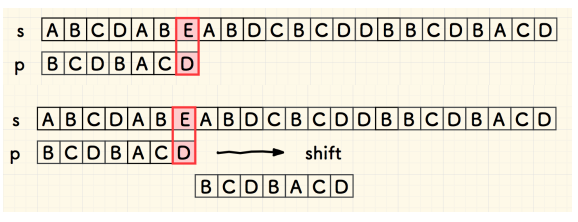 | 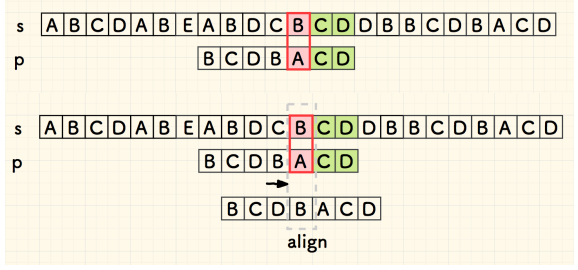 | 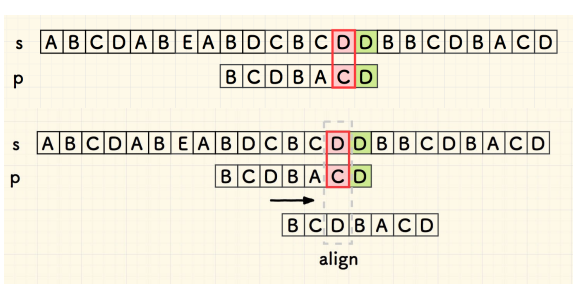 | 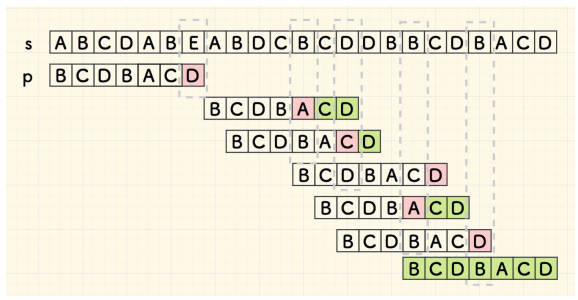 |

| Good Suffix Heuristic | | Example |
| -- | -- | -- |
| 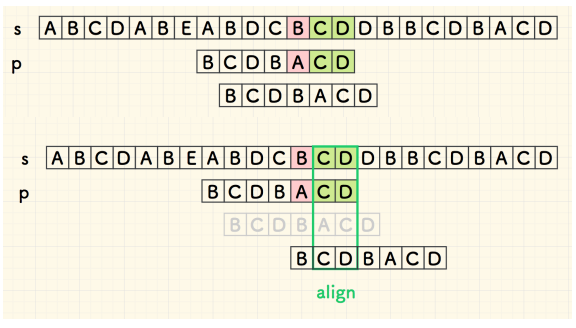 | 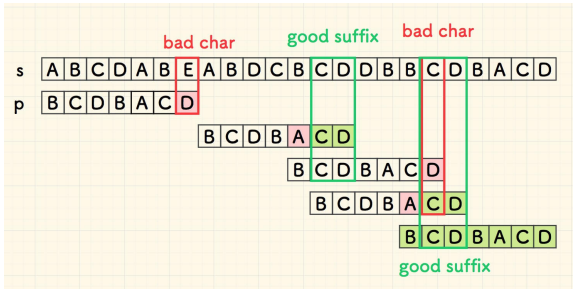 | 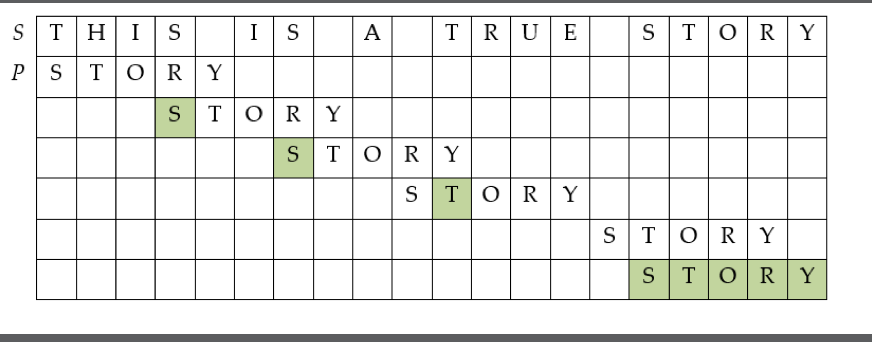 |

The time complexity for best case is $m + \frac{n}{m}$ and worse case is $O(m + nm)$ goes to $O(3n)$.

The space complexity for the bad char table is $O(256m)$ or $O(m)$, suffix/preffix is $O(m)$. 

In [21]:
ALPHABET_SIZE = 256


def build_badchar_tbl(p): 
    badchar_tbl = {}
    
    for j in range(ALPHABET_SIZE): 
        badchar_tbl[j] = -1
    
    for j in range(len(p)):
        badchar_tbl[ord(p[j])] = j
    
    return badchar_tbl 


def build_goodsuffix_arr(p): 
    m = len(p)
    suffix = [-1 for _ in range(m)]
    prefix = [False for _ in range(m)]

    for i in range(m - 1): 
        j = i 
        k = 0
        
        while j >= 0 and p[j] == p[m - 1 - k]: 
            k += 1
            suffix[k] = j 
            j -= 1
        
        if j == -1: 
            prefix[k] = True
    
    return suffix, prefix 


def search_bm_shift_goodsuffix(suffix, prefix, m, j): 
    k =  m - 1 - j # length of good suffix 
    
    if suffix[k] != -1: 
        return j - suffix[k] + 1
    
    for r in range(j+2, m, 1): 
        if prefix[m-r]: 
            return r
    return m 

def search_bm(s, p): 
    len_s, len_p = len(s), len(p)

    if len_s < len_p:
        return -1 

    if len_p == 0: 
        return 0

    badchar_tbl = build_badchar_tbl(p)
    suffix, prefix = build_goodsuffix_arr(p)
    
    for i in range(len_s - len_p + 1): 
        j = len_p - 1 
        
        while j >= 0 and s[i+j] == p[j]: 
            j -= 1
        
        if j < 0: 
            return i 
        
        d1 = j - badchar_tbl[ord(s[i+j])]
        d1 = 1 if d1 <= 0 else d1 
        
        d2 = 0 
        
        if len_p - 1 - j > 0: 
            d2 = search_bm_shift_goodsuffix(suffix, prefix, len_p, j)
        i += max(d1, d2)
    return -1

print("Result: ", search_bm(text, pattern))    

Result:  12


### Knuth-Morris-Pratt

In [68]:
def build_next_arr(p):
    next_arr = [-1] * len(p)
    k = -1
    next_arr[0] = -1
    
    for i in range(1, len(p)): 
        while k != -1 and p[k + 1] != p[i]: 
            k = next_arr[k]
        
        if p[k + 1] == p[i]:
            k += 1
        
        next_arr[i] = k 
    
    return next_arr


def search_kmp(s, p): 
    n, m = len(s), len(p) # source length, pattern length 
    
    if n < m or m == 0:
        return -1
    
    next_arr = build_next_arr(p)
    j = 0
    c = 0
    
    for i in range(n): 
        print(i, "S", s)

        while j > 0 and s[i] != p[j]: 
            j = next_arr[j - 1] + 1 
        
        if s[i] == p[j]:
            j += 1
            
        print(i, "P", j * " ", p[0:j + 1])
        c += len(p[0:j + 1])
        
        if j == m:
            return i - m + 1 
        
        
    print(c)
    return -1

print("Result: ", search_kmp("ABABABCABABABCABD", "ABABCD"))  

0 S ABABABCABABABCABD
0 P   AB
1 S ABABABCABABABCABD
1 P    ABA
2 S ABABABCABABABCABD
2 P     ABAB
3 S ABABABCABABABCABD
3 P      ABABC
4 S ABABABCABABABCABD
4 P     ABAB
5 S ABABABCABABABCABD
5 P      ABABC
6 S ABABABCABABABCABD
6 P       ABABCD
7 S ABABABCABABABCABD
7 P   AB
8 S ABABABCABABABCABD
8 P    ABA
9 S ABABABCABABABCABD
9 P     ABAB
10 S ABABABCABABABCABD
10 P      ABABC
11 S ABABABCABABABCABD
11 P     ABAB
12 S ABABABCABABABCABD
12 P      ABABC
13 S ABABABCABABABCABD
13 P       ABABCD
14 S ABABABCABABABCABD
14 P   AB
15 S ABABABCABABABCABD
15 P    ABA
16 S ABABABCABABABCABD
16 P  A
64
Result:  -1


### Sunday

In [30]:
def search_sunday(s, p): 
    n, m = len(s), len(p) # source length, pattern length 

    if n < m or m == 0:
        return -1 

    badchar_dict = {}

    for i, val in enumerate(p): 
        badchar_dict[val] = m - i
    
    i = 0
    
    while i <= n - m:
        j = 0 
        
        while s[i+j] == p[j]: 
            j += 1

            if j == m: 
                return i
        
        if i + m >= n:
            break; 
        
        offset = badchar_dict[s[i + m]] if s[i + m] in p else m + 1
        i += offset
    
    return -1

print("Result: ", search_sunday(text, pattern)) 

Result:  12


| Pattern Matching | Average | Best | Worst | 
| -- | -- | -- | -- |
| KMP | $O(m + n)$ | $O(n)$ | $O(m + n)$ |
| BP | $O(m + n)$ | $O(m + \frac{n}{m})$ | $O(m + nm)$ |
| Sunday | $O(m + n)$ | $O(m + \frac{n}{m})$ | $O(m + nm)$ |

## Dynamic programming

Solves problems by combining the solutions to subproblems. It can be analogous to "divide-and-conquer" method, where problem is partitioned into disjoint subproblems, subproblems are recursively solved and then combined to find the solution of the original problem.

The dynamic programming is adopted to optimise a problem if the problem has the following properties:

- **Simple Subproblems**: A problem can be divided into subproblems recursively, and subproblems have the way to be parameterised
- **Subproblem Optimisation**: The optimal subproblem solutions can be composited to become an optimal solution for the original problem.
- **Subproblem Overlap**: Optimal solutions to unrelated subproblems can contain subproblems in common.

Examples of such:

1. Matrix Chain Product
2. Fibonacci Sequence
3. Coin Problem

### TMA02 Question

#### Question 7 

Develop an efficient algorithm in Python to find a pattern in a text string.

Constraints:
- Input patten and text are all in lowercase `[a-z]`
- `0 < pattern size (p) < 100`
- `0 < text size (t) < 1000`
- pattern_finder returns True or False depending on whether any permutation of the pattern exists in the text string
- Time Complexity: $O(\text{max}(t,p))$
- Space Complexity: $O(1)$

> Example 1:
> - pattern: `"hack"`
> - text: `"indiahacks"`
> - return: `True`
>
> Example 2:
> - pattern: `"smu"`
> - text: `"imsuperstar"`
> - return: `True`
>
> Example 3:
> - pattern: `"dsa"`
> - text: `"python"`
> - return: `False`


In [31]:
def pattern_finder(pattern, text):
    # Complete your code here
    p = len(pattern)
    t = len(text)
    p_alph = [0] * 26
    
    for i in range(p):
        p_alph[ord(pattern[i]) - ord('a')] += 1
    
    t_alph = [0] * 26
    
    for i in range(p):
        t_alph[ord(text[i]) - ord('a')] += 1
    
    found = True
    
    for i in range(p, t):
        found = True
        
        for j in range(26):
            if p_alph[j] != t_alph[j]:
                found = False
                break
        
        if found:
            return True
        
        t_alph[ord(text[i - p]) - ord('a')] -= 1
        t_alph[ord(text[i]) - ord('a')] += 1
    
    for j in range(26):
        if p_alph[j] != t_alph[j]:
            found = False
            break
    
    if found:
        return True
    
    return False

print(pattern_finder("hack", "indiahacks"))
print(pattern_finder("smu", "imsuperstar"))
print(pattern_finder("dsa", "python"))

True
True
False


### TMA03 Questions

Implement a simple regular expression algorithm. The pattern supports `“.”` and `“*”`:

- `“.”` matches any single character;
- `“*”` matches zero or more of the preceding character.

Constraints:
- Input pattern are all in lowercase English letters `[a-z]`, `“.”` And `“*”`.
- It is guaranteed for each appearance of “*”, there will be a previous valid character to match
- Input text are all in lowercase English letters `[a-z]`
- `0 < pattern size (p) < 100`
- `0 < text size (t) < 1000`
- pattern_matcher returns True or False depending on whether the entire text matches the given pattern (not partial)
- Time Complexity: $O(p \times t)$
- Space Complexity: $O(p \times t)$

> Example 1:
> - pattern: a.a
> - text: aaa
> - return: True
> 
> Example 2:
> - pattern: ab*ac*a
> - text: aaa
> - return: True
> 
> Example 3:
> - pattern: aa.a
> - text: aaa
> - return: False

In [32]:
def pattern_matcher(pattern, text):
    # Complete your code here
    p = len(pattern) + 1
    t = len(text) + 1
    dp = [[False for j in range(p)] for i in range(t)]
    dp[0][0] = True
    
    for j in range(2, p, 2):
        dp[0][j] = dp[0][j - 2] and pattern[j-1] == "*"
        
    for i in range(1, t):
        for j in range(1, p):
            if pattern[j-1] == "*":
                if dp[i][j-2]:
                    dp[i][j] = True
                elif dp[i-1][j] and text[i-1] == pattern[j-2]:
                    dp[i][j] = True;
                elif dp[i-1][j] and pattern[j-2] == ".":
                    dp[i][j] = True
            else:
                if dp[i-1][j-1] and text[i-1] == pattern[j-1]:
                    dp[i][j] = True
                elif dp[i-1][j-1] and pattern[j-1] == '.':
                    dp[i][j] = True
    
    return dp[t-1][p-1]

print(pattern_matcher("a.a", "aaa"))
print(pattern_matcher("ab*ac*a", "aaa"))
print(pattern_matcher("aa.a", "aaa"))

True
True
False
